In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
df.head()
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [63]:
df.koi_disposition[df.koi_disposition == 'CANDIDATE'] = 1
df.koi_disposition[df.koi_disposition == 'FALSE POSITIVE'] = 0
df.koi_disposition[df.koi_disposition == 'CONFIRMED'] = 0
df2 = df.koi_disposition.astype(float)
df2
target_names  = ["Candidate", "Not"]

/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [64]:
data = df.drop("koi_disposition", axis=1)
target = df2.values.reshape(-1,1)
print(data.shape, target.shape)
target.dtype

(6991, 40) (6991, 1)


dtype('float64')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)
X_train.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
3563              0              0              0              0   10.548413   
4099              0              0              0              0   24.754385   
5460              0              0              0              0    1.057336   
1091              0              0              0              0  201.118319   
5999              0              0              0              0   91.649983   

      koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
3563     5.470000e-05    -5.470000e-05   139.064020          0.004110   
4099     1.365000e-04    -1.365000e-04   140.207320          0.004460   
5460     1.230000e-07    -1.230000e-07   131.792007          0.000096   
1091     1.461000e-03    -1.461000e-03   187.569860          0.005290   
5999     3.181000e-03    -3.181000e-03   175.715600          0.028600   

      koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
3563         -0.004110  ...            -133      4.387           0.066   
4099         -0.004460  ...            -144      4.519           0.078   
5460         -0.000096  ...            -140      4.594           0.054   
1091         -0.005290  ...            -112      4.447           0.072   
5999         -0.028600  ...            -233      4.145           0.164   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
3563          -0.123     1.092          0.181         -0.097  298.09543   
4099          -0.052     0.804          0.056         -0.076  295.73535   
5460          -0.027     0.683          0.054         -0.060  292.18417   
1091          -0.108     0.954          0.135         -0.083  283.11377   
5999          -0.164     1.608          0.905         -0.383  294.93198   

            dec  koi_kepmag  
3563  44.737061      13.204  
4099  42.576248      15.514  
5460  49.310040      15.414  
1091  48.131390      13.328  
5999  39.812420      12.964  

[5 rows x 40 columns]

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

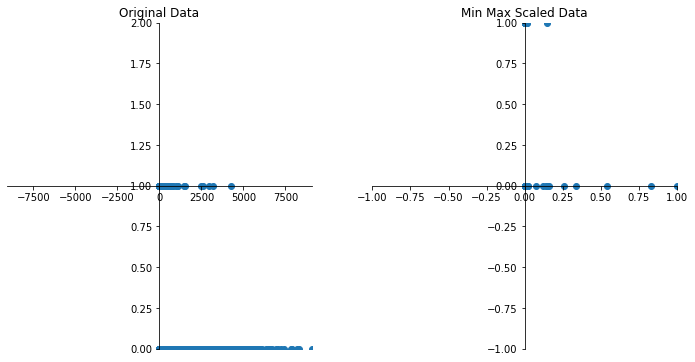

In [49]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["koi_model_snr"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["koi_model_snr"], y_train)
axes2.scatter(X_train_minmax[:,20], y_train_minmax[:])

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [60]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_minmax, y_train)
round(model.score(X_test_minmax, y_test),2)

/Users/pest/anaconda3/envs/PythonData=3.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.91

In [61]:
importances = rf.feature_importances_

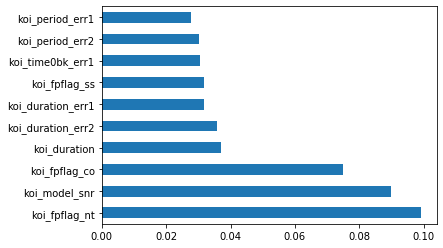

koi_fpflag_nt    0.099019
koi_model_snr    0.089805
koi_fpflag_co    0.074955
dtype: float64


In [62]:
selected_features = pd.Series(rf.feature_importances_, data.columns)
selected_features.nlargest(10).plot(kind='barh')
plt.show()
print(selected_features.nlargest(3))

In [67]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_minmax)
print(classification_report(y_test_minmax, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   Candidate       0.91      0.97      0.94      1344
         Not       0.87      0.70      0.77       404

    accuracy                           0.91      1748
   macro avg       0.89      0.83      0.86      1748
weighted avg       0.90      0.91      0.90      1748

